# 二维 二体系统

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint

### 行星模型 认为中心天体不动

F:\PYTHON\lib\site-packages\scipy\integrate\odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


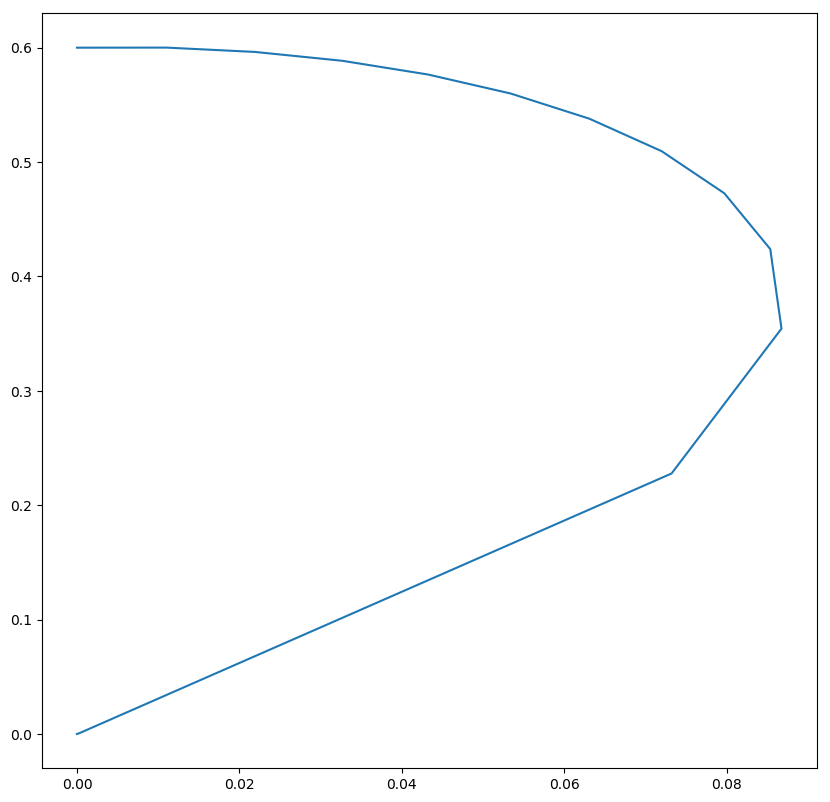

In [2]:
def F(w, t, a, m):#a = G*M
    x1, p1, x2, p2 = w
    return np.array([p1 / m, - a * m * x1 / (x1**2 + x2**2)**3 / 2, p2 / m, -a * m * x2 / (x1**2 + x2**2)**3 / 2])

t = np.arange(0, 60000, 0.01)
track = odeint(F, (0, 1.1, 0.6, 0.2), t, args = (6, 1))

X = track[:, 0]
Y = track[:, 2]

plt.figure(figsize = (10, 10), dpi = 100)
plt.plot(X, Y)

### 两体问题

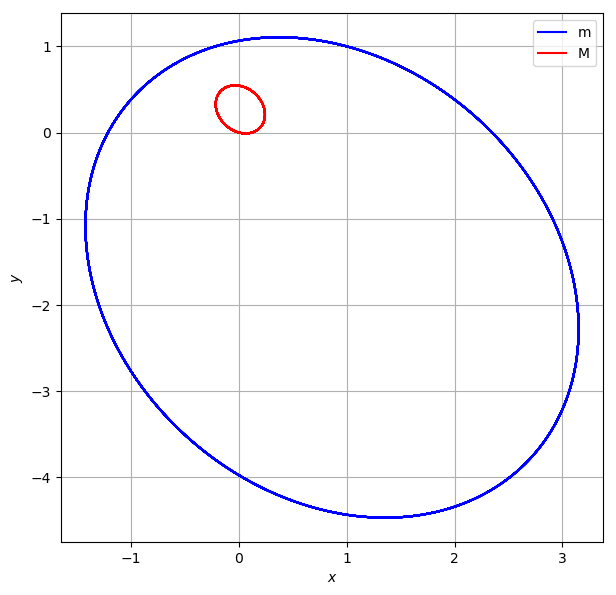

In [12]:
def R(x1, x2, x3, x4):
    return np.power(((x1 - x3)**2 + (x2 - x4)**2), 1/2)

def G(w, t, M, m, G): 
    x1, p1, x2, p2, x3, p3, x4, p4 = w
    return np.array([p1/m,
                     -G * M * m * (x1 - x3) / R(x1, x2, x3, x4)**3,
                     p2 / m,
                     -G * M * m * (x2 - x4) / R(x1, x2, x3, x4)**3,
                     p3 / M,
                     G * M * m * (x1 - x3) / R(x1, x2, x3, x4)**3,
                     p4 / M,
                     G * M * m * (x2 - x4) / R(x1, x2, x3, x4)**3])

t = np.arange(0, 100, 0.001)
track = odeint(G, (1, -3, 1, 1, 0, 3, 0, -1), t, args = (10, 1, 1))#控制系统动量为零

plt.figure(figsize=(7, 7), dpi=100) 
plt.plot(track[:, 0], track[:, 2], 'b')
plt.plot(track[:, 4], track[:, 6], 'r')

plt.legend(['m', "M"])
plt.xlabel("$x$") 
plt.ylabel("$y$") 
plt.grid(True)

### 实际情况

Text(0,0.5,'$y$')

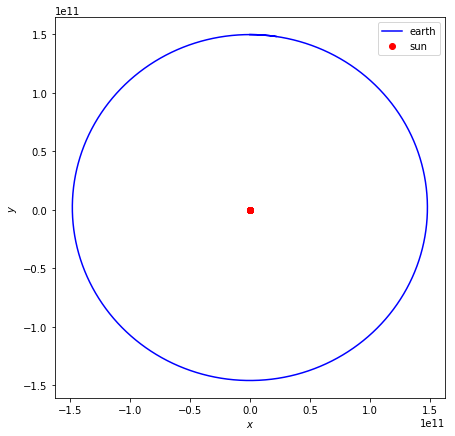

In [44]:
M = 1.9891*10**30     # 太阳质量
m = 5.965*10**24      # 地球质量
G = 6.754*10**(-11)   # 引力常量
r = 1.496*10**11      # 平均日地距离
v = 2.9783*10**4      # 地球平均公转速度

def H(w, t, M, m, G): 
    x1, p1, x2, p2, x3, p3, x4, p4 = w
    return np.array([p1 / m,
                     -G * M * m * (x1 - x3) / R(x1, x2, x3, x4)**3,
                     p2 / m,
                     -G * M * m * (x2 - x4) / R(x1, x2, x3, x4)**3,
                     p3 / M,
                     G * M * m * (x1 - x3) / R(x1, x2, x3, x4)**3,
                     p4 / M,
                     G * M * m * (x2 - x4) / R(x1, x2, x3, x4)**3])

t = np.arange(0, 31536000, 3600)
track = odeint(H, (0, m * v, r, 0,  0, -m*v, 0, 0), t, args=(M, m, G))

plt.figure(figsize=(7, 7)) 
plt.plot(track[:, 0], track[:, 2], 'b')
plt.plot(track[:, 4], track[:, 6], 'ro')
plt.legend(['arth', "sun"])
plt.xlabel("$x$") 
plt.ylabel("$y$") 

## 三体问题

In [19]:
def rab(x1, x2, x3, x4):
    return np.power(((x1 - x3)**2 + (x2 - x4)**2), 1/2)
def rac(x1, x2, x5, x6):
    return np.power(((x1 - x5)**2 + (x2 - x6)**2), 1/2)
def rbc(x3, x4, x5, x6):
    return np.power(((x3 - x5)**2 + (x4 - x6)**2), 1/2)
def T(w, t, m1, m2, m3, G): 
    x1, p1, x2, p2, x3, p3, x4, p4, x5, p5, x6, p6= w
    return np.array([p1 / m1, -G * m1 * m2 * (x1 - x3) / rab(x1, x2, x3, x4)**3 - G * m1 * m3 * (x1 - x5) / rac(x1, x2, x5, x6)**3,
                     p2 / m1, -G * m1 * m2 * (x2 - x4) / rab(x1, x2, x3, x4)**3 - G * m1 * m2 * (x2 - x6) / rac(x1, x2, x5, x6)**3,
                     p3 / m2, -G * m1 * m2 * (x3 - x1) / rab(x1, x2, x3, x4)**3 - G * m2 * m3 * (x3 - x5) / rbc(x3, x4, x5, x6)**3,
                     p4 / m2, -G * m1 * m2 * (x4 - x2) / rab(x1, x2, x3, x4)**3 - G * m2 * m3 * (x4 - x6) / rbc(x3, x4, x5, x6)**3,
                     p5 / m3, -G * m3 * m1 * (x5 - x1) / rac(x1, x2, x5, x6)**3 - G * m2 * m3 * (x5 - x3) / rbc(x3, x4, x5, x6)**3,
                     p6 / m3, -G * m3 * m1 * (x6 - x2) / rac(x1, x2, x5, x6)**3 - G * m3 * m2 * (x6 - x4) / rbc(x3, x4, x5, x6)**3])

t = np.arange(0, 500, 0.001)
track = odeint(T, (1, -10, 1, 5,
                  0, 5, 0, -7,
                 -4, 5, -2, 2),
               t, args=(10, 4, 1, 5))


F:\PYTHON\lib\site-packages\scipy\integrate\odepack.py:236: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


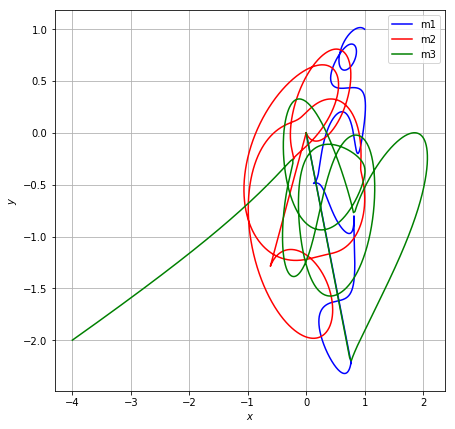

In [20]:
plt.figure(figsize=(7, 7)) 
plt.plot(track[:, 0], track[:, 2], 'b')
plt.plot(track[:, 4], track[:, 6], 'r')
plt.plot(track[:, 8], track[:, 10], 'g')

plt.legend(['m1', "m2", "m3"])
plt.xlabel("$x$") 
plt.ylabel("$y$") 
plt.grid(True)

## 考虑实际值

In [21]:
m1 = 1.9891 * 10**30     # 太阳质量
m2 = 1.90 * 10**27       #木星质量
m3 = 5.965 * 10**24      # 地球质量
G = 6.754 * 10**(-11)   # 引力常量
r2 = 7.79 * 10**11       #木星与太阳的距离
r3 = 1.496 * 10**11      # 日地距离
v2 = 1.307 * 10**4         #木星公转速度
v3 = 2.9783 * 10**4      # 地球平均公转速度


t = np.arange(0, 150 * 3153600, 3600)
track = odeint(T, (0, 0, 0, 0,
                   -r2, 0, 0, -m2 * v2,
                   r3, 0, 0, m3 * v3),
               t, args=(m1, m2, m3, G))


Text(0,0.5,'$y$')

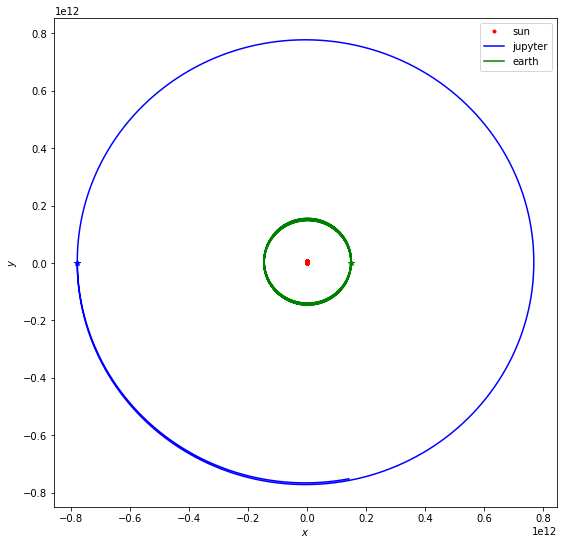

In [22]:
plt.figure(figsize=(9, 9)) 
plt.plot(track[:, 0], track[:, 2], 'r.')
plt.plot(track[:, 4], track[:, 6], 'b')
plt.plot(track[:, 8], track[:, 10], 'g')
plt.plot(r3, 0, 'g*')
plt.plot(-r2, 0, 'b*')

plt.legend(["sun", "jupyter", "earth"])
plt.xlabel("$x$") 
plt.ylabel("$y$") 


In [23]:
Ek0 = m3 * v3 ** 2 / 2
Ek = G * m1 * m3 / 2 / r2
delta_Ep = G * m1 * m3 * (1 / r3 - 1 / r2)
Ek = Ek + delta_Ep
np.sqrt(Ek / Ek0)#动量约为原动量的1.36倍以上

1.3529099099057238

Text(0,0.5,'$y$')

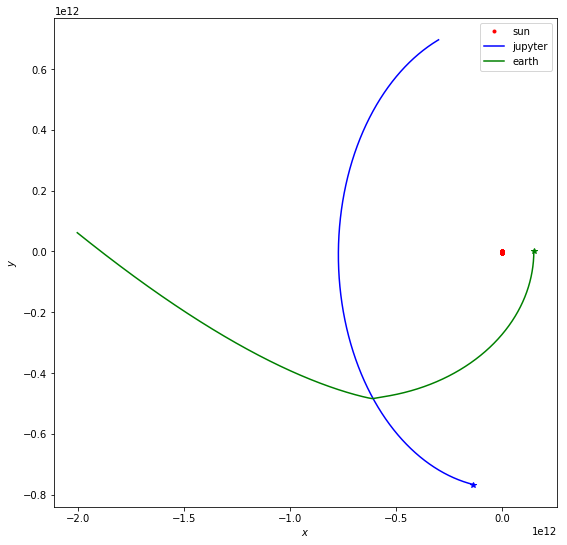

In [24]:
#改变初始地球动量值和木星位置
p = 1.36 * m3 * v3

a = -100
theta = a * np.pi/180

t0 = np.arange(0, 1.5 * 10 ** 8, 1000)
track0  =  odeint(T, (0, 0, 0, 0, 
                  r2 * np.cos(theta), m2 * v2 * np.sin(theta), r2 * np.sin(theta), -m2 * v2 * np.cos(theta), 
                 r3, 0, 0, -p), t0, args = (m1, m2, m3, G))


plt.figure(figsize = (9, 9)) 
plt.plot(track0[:, 0], track0[:, 2], 'r.')
plt.plot(track0[:, 4], track0[:, 6], 'b')
plt.plot(track0[:, 8], track0[:, 10], 'g')
plt.plot(r3, 0, 'g* ')
plt.plot(r2 * np.cos(theta), r2 * np.sin(theta), 'b* ')

plt.legend(["sun", "jupyter", "earth"])
plt.xlabel("$x$") 
plt.ylabel("$y$") 

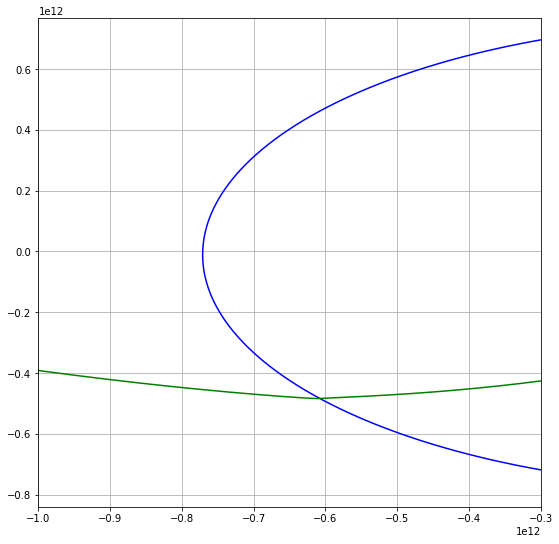

In [27]:
plt.figure(figsize=(9, 9)) 
plt.plot(track0[:, 0], track0[:, 2], 'r.')
plt.plot(track0[:, 4], track0[:, 6], 'b')
plt.plot(track0[:, 8], track0[:, 10], 'g')
plt.plot(r3, 0, 'g*')
plt.plot(r2 * np.cos(theta), r2 * np.sin(theta), 'b*')
plt.xlim(xmin = -1 * 10**12, xmax=-0.3 * 10**12)
plt.grid(True)

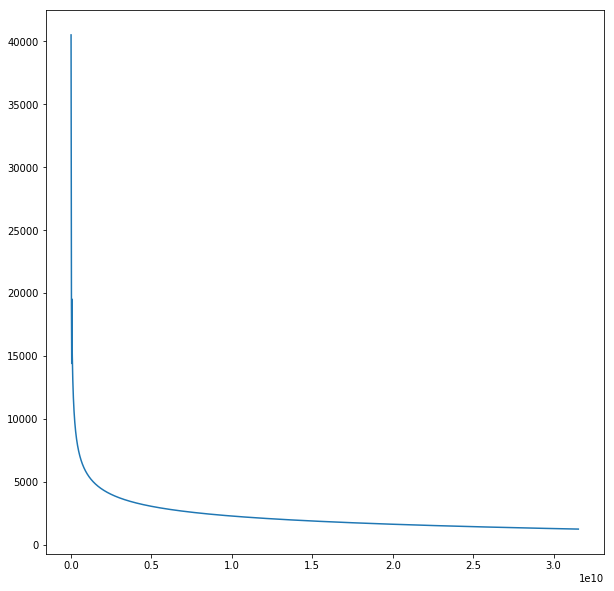

In [38]:
v = np.empty(len(track0))
p1 = track0[:, 9]
p2 = track0[:, 11]
v = np.sqrt(p1**2 + p2**2) / m3
plt.figure(figsize=(10, 10)) 
plt.plot(t0,v)

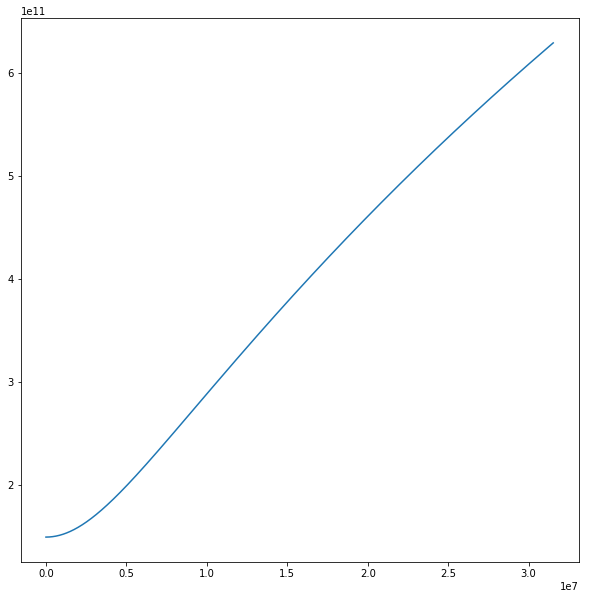

In [42]:
t0 = np.arange(0, 3.1536 * 10**7, 10000)
track0  =  odeint(T, (0, 0, 0, 0, 
                      r2 * np.cos(theta), m2 * v2 * np.sin(theta), r2 * np.sin(theta), -m2 * v2 * np.cos(theta), 
                      r3, 0, 0, -p),
                  t0, args = (m1, m2, m3, G))
x = track0[:, 8]
y = track0[:, 10]
r = np.sqrt(x**2 + y**2)
plt.figure(figsize = (10, 10)) 
plt.plot(t0, r)

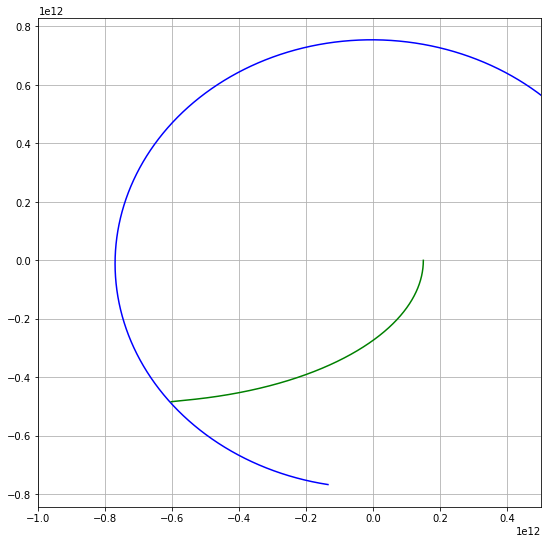

In [77]:
t0 = np.arange(0, 2.6 * 10 ** 8, 1000)
track0  =  odeint(T, (0, 0, 0, 0, 
                      r2 * np.cos(theta), m2 * v2 * np.sin(theta), r2 * np.sin(theta), -m2 * v2 * np.cos(theta), 
                      r3, 0, 0, -p), 
                  t0, args = (m1, m2, m3, G))

t = np.arange(0, 0.43 * 10 ** 8, 1000)#0.29的时候地球与木星轨迹相遇
track  =  odeint(T, (0, 0, 0, 0, 
                     r2 * np.cos(theta), m2 * v2 * np.sin(theta), r2 * np.sin(theta), -m2 * v2 * np.cos(theta), 
                     r3, 0, 0, -p),
                 t, args = (m1, m2, m3, G))

plt.figure(figsize = (9, 9)) 
plt.plot(track0[:, 4], track0[:, 6], 'b')
plt.plot(track[:, 8], track[:, 10], 'g')
plt.xlim(xmin = -0.5 * 10 ** 12, xmax = 0.5 * 10 ** 12)
plt.grid(True)

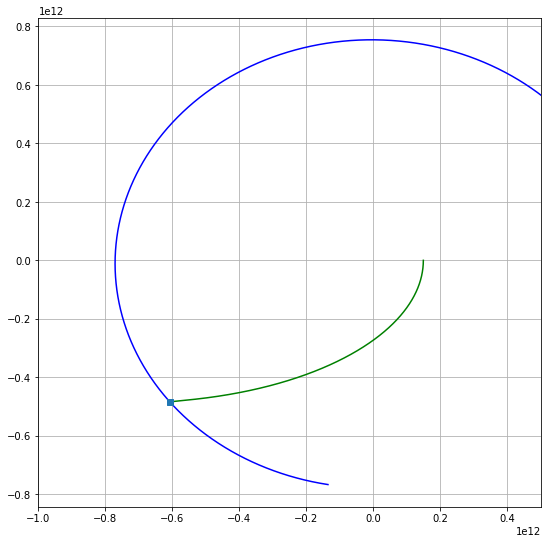

In [78]:
plt.figure(figsize=(9, 9)) 
plt.plot(track0[:, 4], track0[:, 6], 'b')
plt.plot(track[:, 8], track[:, 10], 'g')
plt.plot(track[len(track) - 1, 4], track[len(track) - 1, 6], "s")
plt.xlim(xmin = -1 * 10**12, xmax = 0.5 * 10**12)
plt.grid(True)

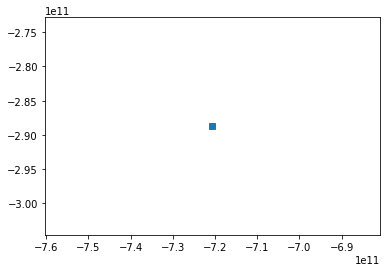

In [66]:
plt.plot(track[len(track)-1, 4], track[len(track)-1, 6], "s")

Text(0,0.5,'$y$')

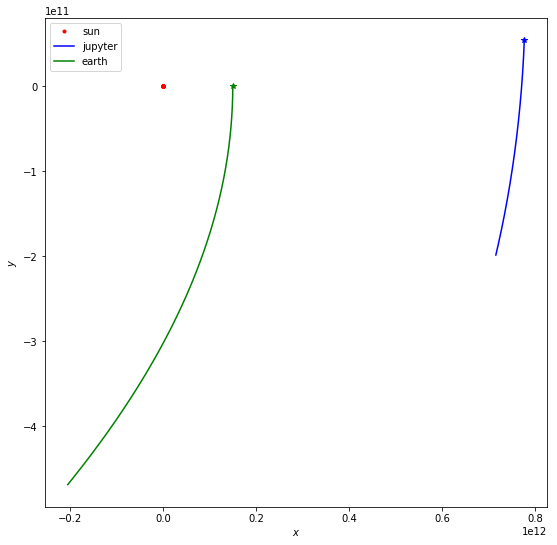

In [90]:
p = 1.43  *  m3  *  v3

a = 6.97
theta = a  *  np.pi / 180

t0 = np.arange(0, 6.2  *  3153600, 3600)
track0 = odeint(T, (0, 0, 0, 0, 
                   r2 * np.cos(theta), -m2 * v2 * np.sin(theta), r2 * np.sin(theta), -m2 * v2 * np.cos(theta), 
                   r3, 0, 0, -p), 
                t0, args=(m1, m2, m3, G))

plt.figure(figsize=(9, 9)) 
plt.plot(track0[:, 0], track0[:, 2], 'r.')
plt.plot(track0[:, 4], track0[:, 6], 'b')
plt.plot(track0[:, 8], track0[:, 10], 'g')
plt.plot(r3, 0, 'g* ')
plt.plot(r2 * np.cos(theta), r2 * np.sin(theta), 'b* ')
plt.vlines(0,  0,  0.5,  colors = "c",  linestyles = "dashed")

plt.legend(["sun", "jupyter", "earth"])
plt.xlabel("$x$") 
plt.ylabel("$y$") 

Text(0,0.5,'$y$')

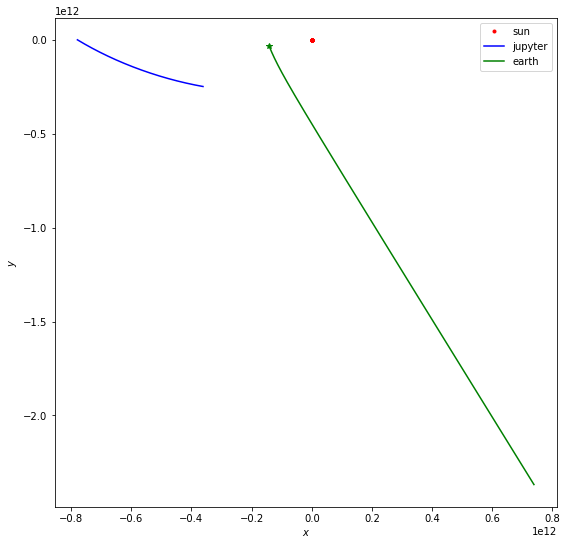

In [36]:
t = np.arange(0, 15 * 3153600, 3600)
track  =  odeint(T, (0, 0, 0, 0, 
                     -r2, 0, 0, -m2 * v2, 
                     r3, 0, 0, m3 * v3), 
                 t, args = (m1, m2, m3, G))
p1 = track[13140-1, 9]
p2 = track[13140-1, 11]
p1 = 3 * p1
p2 = 3 * p2

x0 = track[13140-1, 8]
y0 = track[13140-1, 10]

pj1 = track[13140-1, 5]
pj2 = track[13140-1, 7]

t = np.arange(0, 0.3 * 10 ** 8, 1000)
track2  =  odeint(T, (0, 0, 0, 0, 
                      -r2, pj1, 0, pj2, 
                      x0, p1, y0, p2), 
                  t, args = (m1, m2, m3, G))

plt.figure(figsize = (9, 9)) 
plt.plot(track2[:, 0], track2[:, 2], 'r.')
plt.plot(track2[:, 4], track2[:, 6], 'b')
plt.plot(track2[:, 8], track2[:, 10], 'g')
plt.plot(x0, y0, 'g* ')


plt.legend(["sun", "jupyter", "earth"])
plt.xlabel("$x$") 
plt.ylabel("$y$") 

Text(0,0.5,'$y$')

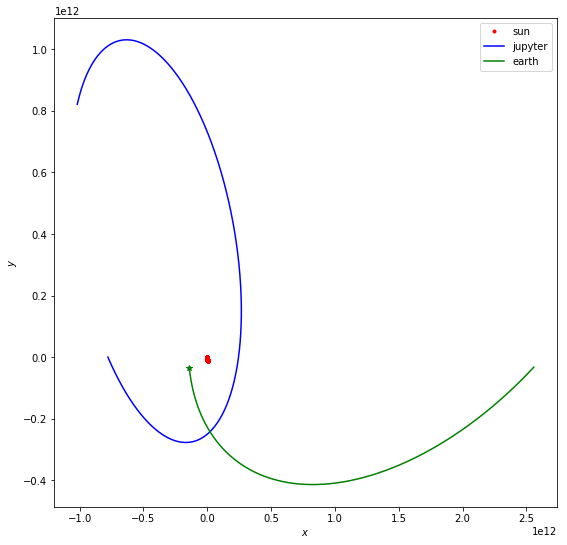

In [32]:
### t = np.arange(0, 15 * 3153600, 3600)
track  =  odeint(T, (0, 0, 0, 0, 
                     -r2, 0, 0, -m2 * v2, 
                     r3, 0, 0, m3 * v3), 
                 t, args = (m1, m2, m3, G))
p1 = track[13140-1, 9]
p2 = track[13140-1, 11]
p1 = 1.38 * p1
p2 = 1.38 * p2

x0 = track[13140-1, 8]
y0 = track[13140-1, 10]

pj1 = track[13140-1, 5]
pj2 = track[13140-1, 7]

t = np.arange(0, 80 * 3153600, 3600)
track2  =  odeint(T, (0, 0, 0, 0, 
                      -r2, pj1, 0, pj2, 
                      x0, p1, y0, p2), 
                  t, args = (m1, m2, m3, G))

plt.figure(figsize = (9, 9)) 
plt.plot(track2[:, 0], track2[:, 2], 'r.')
plt.plot(track2[:, 4], track2[:, 6], 'b')
plt.plot(track2[:, 8], track2[:, 10], 'g')
plt.plot(x0, y0, 'g* ')


plt.legend(["sun", "jupyter", "earth"])
plt.xlabel("$x$") 
plt.ylabel("$y$")